<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%207%20Introduction%20to%20Well-Test%20Analysis/notebook/7_examples_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 7 Introduction to Well-Test Analysis (Part 2)**

The **Part 1** of **Unit 7** notebook contains **2 of 6 flow test types** (Chap 7.6 and 7.7)

The overall types of well-test types are:
* Constant-Rate Flow Tests (Chap 7.2)
* Multirate Flow Tests (Chap 7.3)
* Constant-Pressure Flow Tests (Chap 7.4)
* Constant-Rate Pressure Buildup Tests (Chap 7.5)
* Multirate Buildup Tests (Chap 7.6)
* Buildup Analysis of Finite-Acting Wells (Chap 7.7)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 626 (delta 36), reused 0 (delta 0), pack-reused 535
Receiving objects: 100% (626/626), 2.79 MiB | 24.04 MiB/s, done.
Resolving deltas: 100% (259/259), done.


## **Chapter 7.6 Multirate Buildup Tests**

### Example 7.5 Multirate Buildup Test

(0, 26)

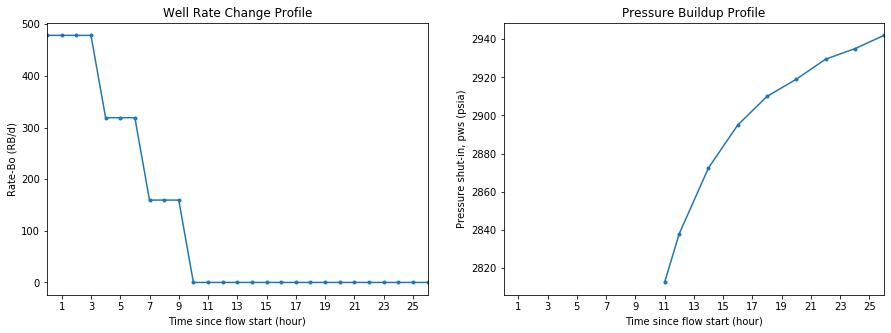

In [13]:
"Task. determine permeability-thickness product (kh) and initial pressure (pi)"

# known: buildup (shut-in) is preceded by multirate tests

mu_oil = 0.6

time = [0, 3, 6, 9, 26] # time at j=0, 1, 2, 3, 4
q = [0, 478.5, 319, 159.5, 0] # rate times Bo (in unit RB/d, because RB/STB*STB/d), at time 4 = 0 RB/d
time_shut = time[3] # time when shut-in

# time in the data is time after shut-in
multirate_buildup = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.9-Multirate-Buildup-Test Data Example 7.5.csv')

# visualize rate change before shut-in
time_arr = np.arange(0, 27, 1)
q_arr = []
for i in range(len(time_arr)):
  if i >= time[0] and i <= time[1]:
    rate = q[1]
    q_arr.append(float(rate))
  if i > time[1] and i <= time[2]:
    rate = q[2]
    q_arr.append(float(rate))
  if i > time[2] and i <= time[3]:
    rate = q[3]
    q_arr.append(float(rate))
  if i > time[3] and i <= time[4]:
    rate = q[4]
    q_arr.append(float(rate))

time_since = multirate_buildup.t + time_shut

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time_arr, q_arr, '.-')
plt.title('Well Rate Change Profile')
plt.xlabel('Time since flow start (hour)'); plt.ylabel('Rate-Bo (RB/d)')
plt.xticks(np.arange(1, 27, 2))
plt.xlim(0, 26)

# plot buildup pressure transient profile
plt.subplot(1, 2, 2)
plt.plot(time_since, multirate_buildup.p, '.-')
plt.title('Pressure Buildup Profile')
plt.xlabel('Time since flow start (hour)'); plt.ylabel('Pressure shut-in, pws (psia)')
plt.xticks(np.arange(1, 27, 2))
plt.xlim(0, 26)

Text(0, 0.5, 'Pressure shut-in, pws (psia)')

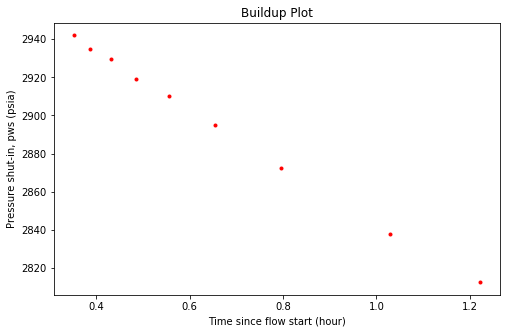

In [4]:
first_term = (q[1] / q[3]) * np.log10(time_since / (time_since - time[1]))
second_term = (q[2] / q[3]) * np.log10((time_since - time[1]) / (time_since - time[2]))
third_term = (q[3] / q[3]) * np.log10((time_since - time[2]) / (time_since - time[3]))
sigma = first_term + second_term + third_term # result is similar to Table 7.10, the Multirate Buildup Plotting Function

plt.figure(figsize=(8, 5))

plt.plot(sigma, multirate_buildup.p, '.', color='r')
plt.title('Buildup Plot')
plt.xlabel('Time since flow start (hour)'); plt.ylabel('Pressure shut-in, pws (psia)')
# plt.xticks(np.arange(1, 27, 2))
# plt.xlim(0, 26)

In [5]:
# linear regression the buildup plot

x6 = sigma
y6 = multirate_buildup.p

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c6, m6 = regression(x6, y6)
pi = c6 # initial pressure equals to intercept c5
print("Slope of linear-region Horner plot:", m6)
print("Intercept of linear-region Horner plot:", c6, "psia")
print("The initial reservoir pressure equals to the intercept:", pi, "psia")

Slope of linear-region Horner plot: -149.44284950739163
Intercept of linear-region Horner plot: 2992.934339488698 psia
The initial reservoir pressure equals to the intercept: 2992.934339488698 psia


In [6]:
# calculate permeability-factor
kh = - (162.6 * q[3] * mu_oil) / m6
print("Permeability-factor from buildup test:", kh, "mD-ft")

Permeability-factor from buildup test: 104.12555737054748 mD-ft


Skin factor `s` cannot be calculated because:
* Only permeability factor `kh` is already known, but no `k` or `h`
* No information on `poro`, `Bo`, `ct`, and `rw`

However, in common practices of calculating `s`, similar to previous Chapters, **pressure value at 1 hour after shut-in** (well shut-in after 9 hours flowing) `b1hr` can be calculated. If the above information is known, then `s` can be calculated. 

In [12]:
# calculate b1hr, pressure at 1 hour
b1hr = pi + m6 * np.log10(time[3] + 1) # time[3] is time when shut-in
print("Pressure in well 1 hour after shut-in (10 hours since flowing):", b1hr, "psia")

Pressure in well 1 hour after shut-in (10 hours since flowing): 2843.491489981306 psia


## **Chapter 7.7 Buildup Analysis of Finite-Acting Wells**

Analysis of pressure buildup in finite-acting wells is based on determination of 3 parameters: `C`, `m`, and `m*` from plot of **pressure vs time** to fit **Equation 7.55**. There are 2 methods:


*   **Nonlinear regression**: If **the rate at which pressure declines before shut-in for buildup, or `m*`** is **not known**, nonlinear regression is used to directly determine all 3 parameters. 
*   **Slider's method**: If **the rate at which pressure declines before shut-in for buildup, or `m*`** is **known**, the other 2 parameters `C` and `m` can be determined from **linear regression of plot `(pws - (m*) * delta_t)` vs `log(delta_t)`**.



### Example 7.6 Buildup Test on a Finite-Acting Reservoir

(0, 28)

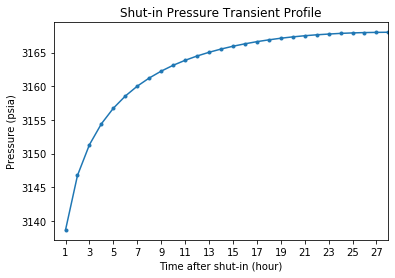

In [9]:
"Task. calculate pore volume Vp and permeability-thickness kh"

# known
qB = 333.3 # rate multiplied by Bo, in RB/d
ct = 8E-06 # in psi^-1
mu_oil = 2 # cP

# rate at which pressure declines before shut-in buildup, m*, we use Slider's method
m_star = -0.431 # in psi/h

finite_buildup = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.11-Reservoir Parameters and Pressure Data Example 7.6.csv')

plt.plot(finite_buildup.t, finite_buildup.p, '.-')
plt.title('Shut-in Pressure Transient Profile')
plt.xlabel('Time after shut-in (hour)'); plt.ylabel('Pressure (psia)')
plt.xticks(np.arange(1, 28, 2))
plt.xlim(0, 28)

In [4]:
# calculate pore volume Vp
Vp = - (0.23395 * qB) / (ct * m_star)
print("Pore volume:", Vp / 1E+06, "million cubic ft")

Pore volume: 22.61471432714617 million cubic ft


(0, 1.6)

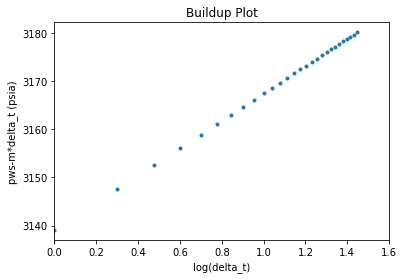

In [5]:
# buildup plot
axis_x = np.log10(finite_buildup.t)
axis_y = finite_buildup.p - (m_star * finite_buildup.t)

plt.plot(axis_x, axis_y, '.')
plt.title('Buildup Plot')
plt.xlabel('log(delta_t)'); plt.ylabel('pws-m*delta_t (psia)')
plt.xlim(0, 1.6)

In [7]:
x7 = axis_x
y7 = axis_y

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c7, m7 = regression(x7, y7)
pi = c7 # initial pressure equals to intercept c5
print("Slope of buildup plot (m):", m7, "psi/cycle")
print("Intercept of buildup plot (C):", c7, "psia")

Slope of buildup plot (m): 28.33596536151054 psi/cycle
Intercept of buildup plot (C): 3139.0808716766155 psia


In [8]:
# calculate permeability-factor
kh = - (162.6 * qB * mu_oil) / m7
print("Permeability-factor from buildup test:", np.abs(kh), "mD-ft")

Permeability-factor from buildup test: 3825.1444274853525 mD-ft


### Example 7.6 (Bonus) Use of Nonlinear Regression

Nonlinear regression equation: `pws = C + (m * log(t)) + (m_star * t)`. 

Plot: `pws` vs `time`, regression **at early time** (???)

(0, 28)

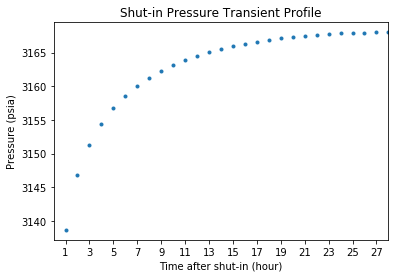

In [11]:
plt.plot(finite_buildup.t, finite_buildup.p, '.')
plt.title('Shut-in Pressure Transient Profile')
plt.xlabel('Time after shut-in (hour)'); plt.ylabel('Pressure (psia)')
plt.xticks(np.arange(1, 28, 2))
plt.xlim(0, 28)

(0, 28)

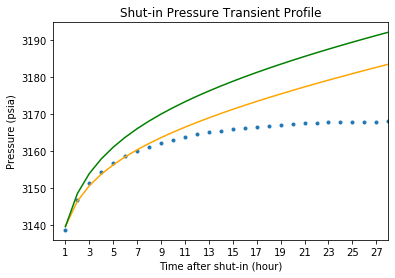

In [62]:
def nonlinreg_iterative(x, c, m, m_star):
  # x: time
  y_reg = c + (m * np.log10(x)) + (m_star * x)
  return(y_reg)

# my own solution
P_reg1 = nonlinreg_iterative(finite_buildup.t, c=3139.1, m=21, m_star=0.5)

# book's solution
P_reg2 = nonlinreg_iterative(finite_buildup.t, c=3139.1, m=28.33, m_star=0.43095)

plt.plot(finite_buildup.t, finite_buildup.p, '.')

# regression
plt.plot(finite_buildup.t, P_reg1, color='orange')
plt.plot(finite_buildup.t, P_reg2, color='green')

plt.title('Shut-in Pressure Transient Profile')
plt.xlabel('Time after shut-in (hour)'); plt.ylabel('Pressure (psia)')
plt.xticks(np.arange(1, 28, 2))
plt.xlim(0, 28)